In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("prepocessed_14th.csv")

In [114]:
df.head()

,Unnamed: 0,index,url,book_id,title,award_count,author,avg_rating,num_reviews,num_ratings,num_pages,original_publish_year,series,genres,awards,place,minmax_norm_ratings,normalise_mean
0,0,0,https://www.goodreads.com/book/show/16046121-a...,16046121.0,After Forever Ends,0,Melodie Ramone,4.04,1489,1489,564,2012.0,False,"Romance, Contemporary, Fiction, Fantasy, Women...",NaN,NaN,7.750000,5.404107
1,1,1,https://www.goodreads.com/book/show/9849568-th...,9849568.0,The Human Obsession,0,Heath Sommer,4.14,182,182,314,2010.0,True,"Mystery, Psychology, Fiction, Mystery, Crime",NaN,NaN,8.042208,5.696315
2,2,2,https://www.goodreads.com/book/show/5152561-fr...,5152561.0,Fragile Eternity,1,Melissa Marr,3.84,41977,41977,389,2009.0,True,"Young Adult, Fantasy, Fantasy, Paranormal, Rom...",Goodreads Choice Award Nominee for Young Adult...,NaN,7.165584,4.819692
3,3,3,https://www.goodreads.com/book/show/84145.Danc...,84145.0,Dance with the Devil,7,Sherrilyn Kenyon,4.37,62339,62339,361,2003.0,True,"Romance, Paranormal Romance, Fantasy, Paranorm...",All About Romance (AAR) Annual Reader Poll for...,"Fairbanks, Alaska",8.714286,6.368393
4,4,4,https://www.goodreads.com/book/show/56313556-m...,56313556.0,Making Hearts,0,Jack Getze,4.29,2648,2648,148,2020.0,False,"Contemporary, Drama, Novels, Fiction, Epic",NaN,NaN,8.480519,6.134627


In [50]:
#The most reviewed books 
mostly_reviewed = df.sort_values(by='num_reviews', ascending=False) # Sorting by number of reviews
mostly_reviewed = mostly_reviewed[['title','num_reviews']] # Selecting just the columns we want
mostly_reviewed = mostly_reviewed.head(15) # Choosing only the top 10 books

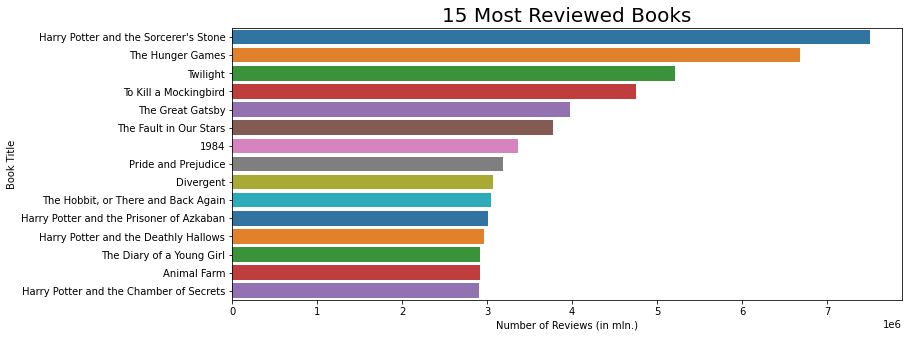

In [51]:
# The 15 mostly reviewed books
plt.figure(figsize=(12,5))
sns.barplot(y='title', x='num_reviews', data = mostly_reviewed, palette="tab10")
plt.title('15 Most Reviewed Books', fontsize='20')
plt.xlabel('Number of Reviews (in mln.)')
plt.ylabel('Book Title')

plt.show()

In [10]:
pip install sweetviz

In [11]:
import sweetviz as sv
import IPython as ip
x=df.drop('title',axis=1)
y=df['title']
analyze_report = sv.analyze(df)
analyze_report.show_html('analyze.html', open_browser=False)
ip.display.HTML('analyze.html')

<AxesSubplot:xlabel='num_pages', ylabel='num_ratings'>

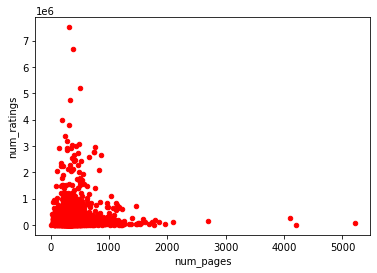

In [23]:
df.plot.scatter(x='num_pages',y='num_ratings',c="red")

In [60]:
# 2. Can you compute numerically the correlation coefficient of these two columns? (between pages and num_rating)
corr_pages_review = df.corr().loc['num_pages','num_ratings']
print (f"Correlation between number of pages and rating is {round(corr_pages_review,5)}")



Correlation between number of pages and rating is -0.02787


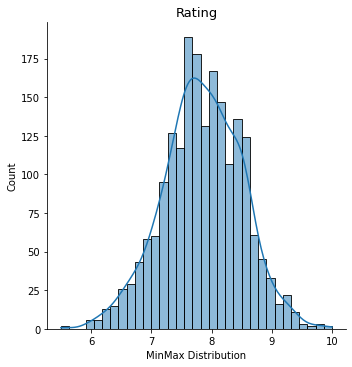

In [134]:
# 4. Visualise the minmax_norm_rating distribution.

sns.displot(df, x="minmax_norm_ratings", kde=True, fill=True)
plt.title('Normalised Min/Max', fontsize='13')
plt.xlabel('Rating')
plt.show()

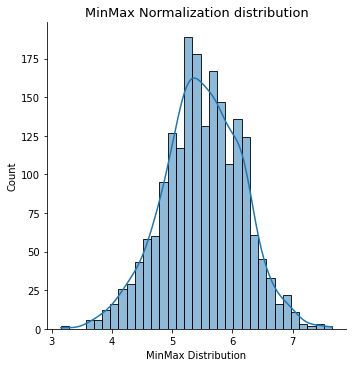

In [139]:

sns.displot(df, x="normalise_mean", kde=True, fill=True)
plt.title('MinMax Normalization distribution', fontsize='13')
plt.xlabel('MinMax Distribution')
plt.show()

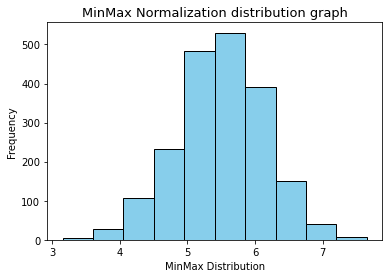

In [106]:
#A) Frequency distribution 

df['normalise_mean'].hist(ec='black', color='skyblue')
plt.ylabel('Frequency')
plt.title('MinMax Normalization distribution graph', fontsize='13')
plt.xlabel('MinMax Distribution')
plt.grid(False)
plt.show()

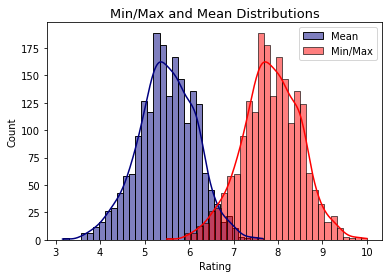

In [138]:
# 6. Create one graph that represents in the same figure both `minmax_norm_rating` and `mean_norm_rating`distributions.
sns.histplot(data=df, x="normalise_mean", color="navy", label="Mean", kde=True)
sns.histplot(data=df, x="minmax_norm_ratings", color="red", label="Min/Max", kde=True)
plt.xlabel('Rating')
plt.title('Min/Max and Mean Distributions', fontsize='13')
plt.legend(loc=1) 
plt.show()

In [ ]:
# aggregate bars

Text(0.5, 1.0, 'Number of Awards')

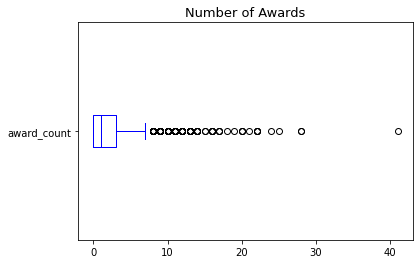

In [152]:
#8. Visualize the `awards` distribution in a **boxplot** and **aggregated bars**. Decide which of these representations gives us more information and in which cases they should be used.

#boxplot

df[['award_count']].plot.box(vert=False, color='blue')
plt.title('Number of Awards', fontsize='13')

In [55]:
pearsoncorr = df.corr(method='pearson')
pearsoncorr

,Unnamed: 0,index,book_id,award_count,avg_rating,num_reviews,num_ratings,num_pages,original_publish_year,series,normalise_mean
Unnamed: 0,1.000000,0.999997,0.052113,-0.053393,-0.009618,-0.096868,-0.096868,-0.035919,0.016994,0.005347,-0.009618
index,0.999997,1.000000,0.052139,-0.053340,-0.009579,-0.096952,-0.096952,-0.035891,0.016995,0.005242,-0.009579
book_id,0.052113,0.052139,1.000000,0.039807,0.234458,-0.030889,-0.030889,-0.045680,0.119193,0.044181,0.234458
award_count,-0.053393,-0.053340,0.039807,1.000000,0.023486,0.420415,0.420415,-0.004616,0.100087,0.034018,0.023486
avg_rating,-0.009618,-0.009579,0.234458,0.023486,1.000000,0.048319,0.048319,0.235291,0.097340,0.132085,1.000000
num_reviews,-0.096868,-0.096952,-0.030889,0.420415,0.048319,1.000000,1.000000,-0.027872,0.009977,0.016422,0.048319
num_ratings,-0.096868,-0.096952,-0.030889,0.420415,0.048319,1.000000,1.000000,-0.027872,0.009977,0.016422,0.048319
num_pages,-0.035919,-0.035891,-0.045680,-0.004616,0.235291,-0.027872,-0.027872,1.000000,0.006785,0.150504,0.235291
original_publish_year,0.016994,0.016995,0.119193,0.100087,0.097340,0.009977,0.009977,0.006785,1.000000,0.099842,0.097340
series,0.005347,0.005242,0.044181,0.034018,0.132085,0.016422,0.016422,0.150504,0.099842,1.000000,0.132085


In [141]:
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='df',
            annot=True,
            linewidth=0.5)

ValueError: 'df' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'